<a href="https://colab.research.google.com/github/KurniaTanggang/emosidarikalimat/blob/main/emosi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menentukan emosi berdasarkan kalimat.  
Dataset : https://www.kaggle.com/ishantjuyal/emotions-in-text

In [ ]:
import pandas as pd
df = pd.read_csv('Emotion_final.csv')

In [ ]:
category = pd.get_dummies(df.Emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

,Text,anger,fear,happy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,0,1,0,0,0,0
21455,Successive state elections have seen the gover...,0,1,0,0,0,0
21456,Vincent was irritated but not dismay,0,1,0,0,0,0
21457,Kendall-Hume turned back to face the dismayed ...,0,1,0,0,0,0


In [ ]:
# mengubah dataframe ke numpy array
teks = df_baru['Text'].values
label = df_baru[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

In [ ]:
# data testing 20%
from sklearn.model_selection import train_test_split
teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=0.2)

In [ ]:
# tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='*')
tokenizer.fit_on_texts(teks_latih) 
tokenizer.fit_on_texts(teks_test)
 
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
# membangun model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai target")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(padded_latih, 
          label_latih, 
          epochs=50, 
          validation_data=(padded_test, label_test), 
          verbose=2,
          callbacks=[callbacks])

Epoch 1/50
537/537 - 23s - loss: 1.3943 - accuracy: 0.3896 - val_loss: 1.1455 - val_accuracy: 0.4697
Epoch 2/50
537/537 - 20s - loss: 0.7528 - accuracy: 0.7165 - val_loss: 0.5915 - val_accuracy: 0.7999
Epoch 3/50
537/537 - 21s - loss: 0.3819 - accuracy: 0.8680 - val_loss: 0.4599 - val_accuracy: 0.8425
Epoch 4/50
537/537 - 20s - loss: 0.2494 - accuracy: 0.9130 - val_loss: 0.3906 - val_accuracy: 0.8660
Epoch 5/50
537/537 - 20s - loss: 0.1878 - accuracy: 0.9341 - val_loss: 0.3870 - val_accuracy: 0.8830
Epoch 6/50
537/537 - 21s - loss: 0.1429 - accuracy: 0.9502 - val_loss: 0.3737 - val_accuracy: 0.8896
Epoch 7/50
537/537 - 20s - loss: 0.1091 - accuracy: 0.9605 - val_loss: 0.3751 - val_accuracy: 0.8872
Epoch 8/50
537/537 - 20s - loss: 0.0962 - accuracy: 0.9662 - val_loss: 0.3479 - val_accuracy: 0.8947
Epoch 9/50
537/537 - 22s - loss: 0.0726 - accuracy: 0.9737 - val_loss: 0.4216 - val_accuracy: 0.8949
Epoch 10/50
537/537 - 21s - loss: 0.0671 - accuracy: 0.9763 - val_loss: 0.4712 - val_accura

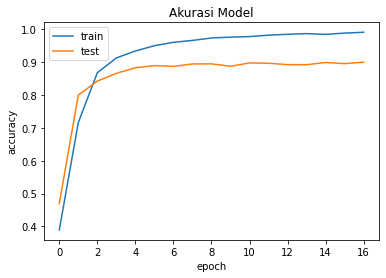

In [ ]:
import matplotlib.pyplot as plt

# plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

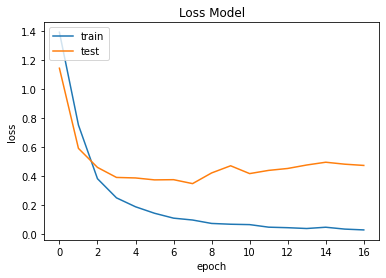

In [ ]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()